In [2]:
# importing libraries
import pandas as pd
import os

cwd = os.path.abspath('CSV Files')
#list all the files from the directory
file_list = os.listdir(cwd)

# converting file list to data frame 
csv_files = list(file_list)
csv_files = pd.DataFrame(csv_files, columns= ["file_name"])
csv_files["file_path"] = "CSV Files/" + csv_files["file_name"]

# merging all the csv files into one main file
df_concat = pd.concat([pd.read_csv(f , parse_dates= ["started_at","ended_at"]) for f in csv_files["file_path"] ], ignore_index=True)
df_concat.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member
1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member
2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member
3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,41.882752,-87.641190,member
4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member


In [3]:
# removing all the null values
cols_with_missing_values = df_concat.columns[df_concat.isna().sum() > 0]
df_concat.dropna(subset =cols_with_missing_values, inplace= True)
df_concat.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [65]:
# adding columns year, month and week
df_concat["year"] = df_concat["started_at"].dt.year
df_concat["month_no"] = df_concat["started_at"].dt.month
df_concat["month"] = df_concat["started_at"].dt.month_name()
df_concat["week_no"] = df_concat["started_at"].dt.weekday
df_concat["week_day"] = df_concat["started_at"].dt.day_name()
df_concat["ride_length"] = (df_concat["ended_at"] - df_concat["started_at"]).dt.seconds
df_concat["ride_length_min"] = np.round(df_concat["ride_length"]/60,2)
cleaned_df = df_concat[df_concat["ride_length"] > 30]
cleaned_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,year,month,week_no,week_day,ride_length,ride_length_min,month_no
0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member,2023,July,6,Sunday,990,16.50,7
1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member,2023,July,6,Sunday,810,13.50,7
2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member,2023,July,6,Sunday,576,9.60,7
3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,41.882752,-87.641190,member,2023,July,4,Friday,296,4.93,7
4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member,2023,July,5,Saturday,686,11.43,7


In [25]:
# Caluclating mean, max of ride length and mode week day

import numpy as np
mean_ride_length = cleaned_df["ride_length"].mean()
max_ride_length = cleaned_df["ride_length"].max()
mode_week_day = cleaned_df["week_day"].mode()
print("mean ride length is", np.round(mean_ride_length/60,2) ,"min")
print("max ride length is", np.round(max_ride_length/60,2) ,"min" )
print("mode week day is", mode_week_day[0])


mean ride length is 16.92 min
max ride length is 1439.98 min
mode week day is Saturday


#  Caluclating average ride length by casual riders and membership riders

               ride_length_min
member_casual                 
casual               24.380506
member               12.707131


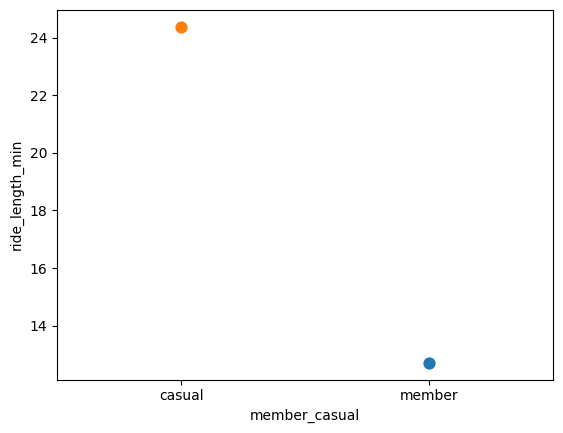

In [45]:
avg_ride_length = cleaned_df.groupby(["member_casual"]).agg({"ride_length_min" : "mean"})
print(avg_ride_length)

import matplotlib.pyplot as plt
import seaborn as sns

sns.pointplot(data= avg_ride_length, x= "member_casual", y= "ride_length_min", hue= "member_casual", hue_order = ["member","casual"])
plt.show()

#  Caluclating weekly trend of average ride length by casual riders and membership riders

                                 ride_length_min
week_no week_day  member_casual                 
0       Monday    casual               23.514403
                  member               11.996955
1       Tuesday   casual               21.462453
                  member               12.116470
2       Wednesday casual               21.236925
                  member               12.138139
3       Thursday  casual               21.054604
                  member               11.966209
4       Friday    casual               23.464615
                  member               12.359043
5       Saturday  casual               27.087345
                  member               14.066415
6       Sunday    casual               27.758429
                  member               14.156534


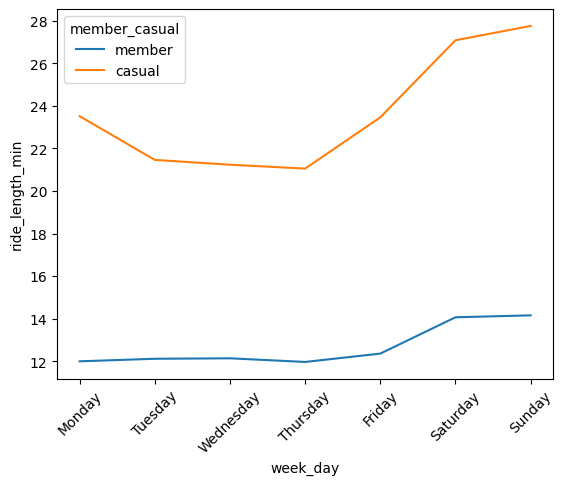

In [43]:
avg_ride_length_week = df_concat.groupby(["week_no","week_day","member_casual"]).agg({"ride_length_min" : "mean"})
print(avg_ride_length_week.sort_values("week_no"))

ax = sns.lineplot(data= avg_ride_length_week, x= "week_day", y= "ride_length_min", hue= "member_casual", hue_order = ["member","casual"])
plt.xticks(rotation = 45)
plt.show()

#  Caluclating no of rides done in week day

                   ride_id
week_no week_day          
0       Monday      647263
1       Tuesday     690447
2       Wednesday   715535
3       Thursday    694336
4       Friday      675843
5       Saturday    749271
6       Sunday      642584


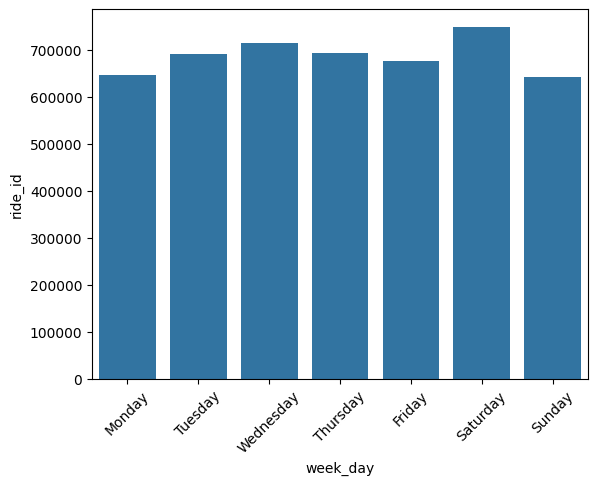

In [44]:
rides_count_week = df_concat.groupby(["week_no","week_day"]).agg({"ride_id" : "count"})
print(rides_count_week.sort_values("week_no"))

sns.barplot(data=rides_count_week, x= "week_day", y= "ride_id")
plt.xticks(rotation = 45)
plt.show()

# Caluclating prefered bike type by riders

                             ride_id
member_casual rideable_type         
member        classic_bike   2098000
              electric_bike   981615
casual        classic_bike   1117992
              electric_bike   584369
              docked_bike      33303


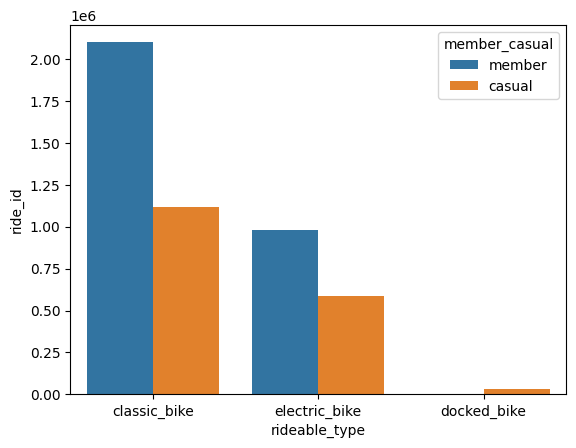

In [47]:
rides_count = df_concat.groupby(["member_casual","rideable_type"]).agg({"ride_id" : "count"})
rides_count = rides_count.sort_values(["member_casual","ride_id"], ascending= False)
print(rides_count)

sns.barplot( data= rides_count, x="rideable_type", y= "ride_id", hue= "member_casual")
plt.show()

# Monthly trend of rides

In [60]:
df_pivot = cleaned_df.pivot_table(values = "ride_id", index= ["year","month_no","month","member_casual"], aggfunc = 'count', fill_value= 0)
df_pivot.rename(columns = {"ride_id": "ride_count"}, inplace= True)
df_pivot

ride_count
year month_no month     member_casual            
2023 7        July      casual             242730
                        member             324440
     8        August    casual             231670
                        member             346780
     9        September casual             195209
                        member             306181
     10       October   casual             129122
                        member             270482
     11       November  casual              71499
                        member             200527
     12       December  casual              36379
                        member             129135
2024 1        January   casual              17527
                        member              94641
     2        February  casual              37845
                        member             145310
     3        March     casual              62193
                        member             165775
     4        April     casual              92858
                        member             201779
     5        May       casual             165607
                        member             271763
     6        June      casual             207190
                        member             285017
     7        July      casual             230565
                        member             307932

#  Stations with most no of rides starting

In [64]:
max_start_stations = df_concat["start_station_name"].value_counts()
max_start_stations = max_start_stations.reset_index()
print("stations where the most no.of rides start -", max_start_stations.iloc[0,0])

stations where the most no.of rides start - Streeter Dr & Grand Ave
